In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"F:\ML\100 days ml\practice\data\countries_metric - Sheet1.csv")

In [3]:
df.head()

,country_name,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),Human Development Index (HDI),GINI,AREA (in Sq km)
0,Afghanistan,"41,454,761",$17.329 billion,411,"2,174",0.496,35.2,"652,867"
1,Albania,"2,402,113",$28.372 billion,"10,526","23,404",0.810,33.0,"28,748"
2,Algeria,"46,700,000",$266.78 billion,"5,722","16,483",0.763,27.6,"2,381,741"
3,Andorra,"87,486",$3.897 billion,"44,900","69,146",0.913,40.0,467.63
4,Angola,"39,040,039",$93.796 billion,"2,432",7077,0.616,51.3,"1,246,700"


In [4]:
df.shape

(194, 8)

In [5]:
df.isnull().mean()*100

country_name                                0.000000
Population (in millions)                    0.000000
Nominal Gross Domestic Product (in USD)     0.000000
Nominal GDP Per capita (in USD)             0.000000
GDP Per capita PPP (in USD)                 0.000000
Human Development Index (HDI)               1.030928
GINI                                       10.309278
AREA (in Sq km)                             0.000000
dtype: float64

In [6]:
df.dropna(inplace=True,ignore_index=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country_name                             174 non-null    object 
 1   Population (in millions)                 174 non-null    object 
 2   Nominal Gross Domestic Product (in USD)  174 non-null    object 
 3   Nominal GDP Per capita (in USD)          174 non-null    object 
 4   GDP Per capita PPP (in USD)              174 non-null    object 
 5   Human Development Index (HDI)            174 non-null    float64
 6   GINI                                     174 non-null    float64
 7   AREA (in Sq km)                          174 non-null    object 
dtypes: float64(2), object(6)
memory usage: 11.0+ KB


In [17]:
df.head()

,country_name,Population (in millions),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),Human Development Index (HDI),GINI,AREA (in Sq km)
0,Afghanistan,-0.020171,-0.693289,-0.866429,0.496,35.2,-0.036564
1,Albania,-0.270626,-0.281836,-0.165481,0.810,33.0,-0.365026
2,Algeria,0.013468,-0.477251,-0.393990,0.763,27.6,0.873312
3,Andorra,-0.285471,1.116416,1.344777,0.913,40.0,-0.379910
4,Angola,-0.035657,-0.611080,-0.704547,0.616,51.3,0.275960


In [9]:
df['Population (in millions)']=df['Population (in millions)'].astype(str)
df['Population (in millions)']=df['Population (in millions)'].str.replace(',','')
df['Population (in millions)']=pd.to_numeric(df['Population (in millions)'])

In [10]:
df['Nominal GDP Per capita (in USD)']=df['Nominal GDP Per capita (in USD)'].astype(str)
df['Nominal GDP Per capita (in USD)']=df['Nominal GDP Per capita (in USD)'].str.replace(',','')
df['Nominal GDP Per capita (in USD)']=pd.to_numeric(df['Nominal GDP Per capita (in USD)'])

df['GDP Per capita PPP (in USD)']=df['GDP Per capita PPP (in USD)'].astype(str)
df['GDP Per capita PPP (in USD)']=df['GDP Per capita PPP (in USD)'].str.replace(',','')
df['GDP Per capita PPP (in USD)']=pd.to_numeric(df['GDP Per capita PPP (in USD)'])

In [11]:
df['AREA (in Sq km)']=df['AREA (in Sq km)'].astype(str)
df['AREA (in Sq km)']=df['AREA (in Sq km)'].str.replace(',','')
df['AREA (in Sq km)']=pd.to_numeric(df['AREA (in Sq km)'])


In [12]:
df.drop(columns=['Nominal Gross Domestic Product (in USD)'],axis=1,inplace=True)

In [13]:
df.columns

Index(['country_name', 'Population (in millions)',
       'Nominal GDP Per capita (in USD)', 'GDP Per capita PPP (in USD)',
       'Human Development Index (HDI)', 'GINI', 'AREA (in Sq km)'],
      dtype='object')

In [14]:
columns=[ 'Population (in millions)',
       'Nominal GDP Per capita (in USD)', 'GDP Per capita PPP (in USD)','AREA (in Sq km)']

In [15]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df[columns]=ss.fit_transform(df[columns])

In [18]:
data=df.iloc[:,1:8]

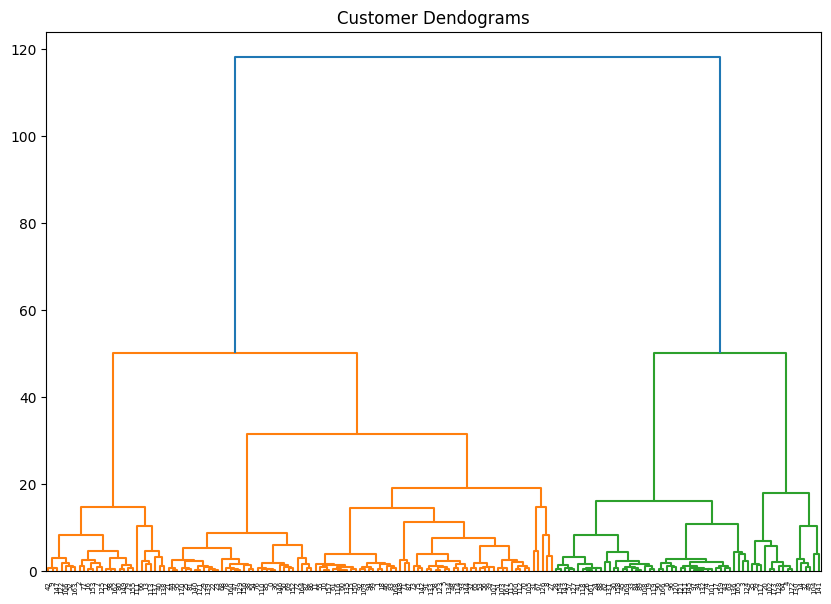

In [19]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title("Customer Dendograms")
dend=sch.dendrogram(sch.linkage(data,method='ward'))

In [62]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
labels=ag.fit_predict(data)

In [63]:
labels

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0],
      dtype=int64)

In [64]:
ag.labels_

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0],
      dtype=int64)

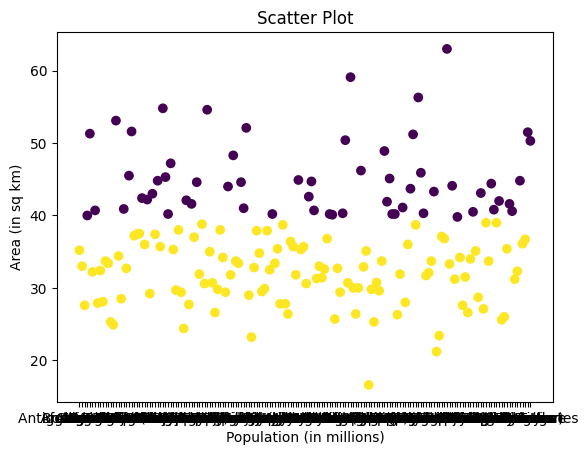

In [65]:
import matplotlib.pyplot as plt

plt.scatter(df['country_name'], df['GINI'],c=labels)
plt.xlabel('Population (in millions)')
plt.ylabel('Area (in sq km)')
plt.title('Scatter Plot')
plt.show()


In [47]:
df.head()

,country_name,Population (in millions),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),Human Development Index (HDI),GINI,AREA (in Sq km)
0,Afghanistan,-0.020171,-0.693289,-0.866429,0.496,35.2,-0.036564
1,Albania,-0.270626,-0.281836,-0.165481,0.810,33.0,-0.365026
2,Algeria,0.013468,-0.477251,-0.393990,0.763,27.6,0.873312
3,Andorra,-0.285471,1.116416,1.344777,0.913,40.0,-0.379910
4,Angola,-0.035657,-0.611080,-0.704547,0.616,51.3,0.275960
